<a href="https://colab.research.google.com/github/avilashsrivastava/Telecom-Churn-Analysis/blob/main/Individual_Final_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Orange S.A., formerly France Télécom S.A., is a French multinational telecommunications corporation. The Orange Telecom's Churn Dataset, consists of cleaned customer activity data (features), along with a churn label specifying whether a customer canceled the subscription.

## <b> Explore and analyze the data to discover key factors responsible for customer churn and come up with ways/recommendations to ensure customer retention. </b>

<b>“Hiding within those mounds of data is knowledge that could change the life of a patient, or change the world.”</b>
-Atul Butte, Stanford University 2. Atul J. Butte is a researcher in biomedical informatics and biotechnology entrepreneur in Silicon Valley.(source - [link text](https://en.wikipedia.org/wiki/Atul_Butte))

<b>"DATA"</b>- The word in itself sounds small and insignificant but say that to a Data Scientist, you would surely find yourself in big trouble (might as well get sued legally).
Anyways jokes apart, let me tell you a short story of this dude called 'data'. As far as history goes, when humans first started to write something,marked the beginning of creating first data. From there on there was no stopping. Carving on the walls, writing on leaves, paper and now internet; the medium changed but data was always there and probably will always be there. Advancements in technology is now helping to generate vast amounts of data, one could not even possibly imagine.

Okay you might be thinking; We have data so what can be done! Well let me tell you friends, the world is driven by data. Talk about any field such as engineering, healthcare,defence, agriculture, businesses(product based or service based)
and you name it, data forms an integral part. The solution to solve world problems dwelves within the entirity of data.

That being said, it becomes an utmost priority to first know your data and explain what story hides within it. And therefore come the necessity of 'Exploratory Data Analysis' which may sound very scientific but all it cares about seeing what the data tells so that we can come up with solutions.

Moving on, in this kernal you will see how I used EDA and drawn conclusions from the data. The content of this kernel include:

1.<b> Understating the data:</b> A brief exploration of all the variables and their relationships

2.<b> Data Cleaning:</b> Checking for missing values, handling NANs, outliers

3.<b> Visualising data:</b> With the help of different plots, see what the data tells.

4.<b> Drawing Conclusions:</b> Understanding what are the causes of the problem statement and what can be done to improve.

Lets do it!

# 1. Understanding the data.

First let me import python libraries which will help me a lot through this journey.

<b>Numpy</b> is a library to do high end calculations.

<b>Pandas</b> is a library to help work with dataframes.

<b>Matplotlib and Seaborn</b> are here to help visualize our data 

In [88]:
#importing useful libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#to not get tensed over unnecessary warnings we will ignore them
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (10, 10)
%matplotlib inline

In [89]:
# mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [90]:
#loading our big guy
df=pd.read_csv('/content/drive/MyDrive/Almabetter/Telecom Churn Analysis - Avilash Srivastava/Telecom Churn.csv')

# 'df' is the variable name I gave to the dataframe

In [91]:
#lets see some top 10 and bottom 10 of our data
df.head(10)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
5,AL,118,510,Yes,No,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0,False
6,MA,121,510,No,Yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,False
7,MO,147,415,Yes,No,0,157.0,79,26.69,103.1,94,8.76,211.8,96,9.53,7.1,6,1.92,0,False
8,LA,117,408,No,No,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
9,WV,141,415,Yes,Yes,37,258.6,84,43.96,222.0,111,18.87,326.4,97,14.69,11.2,5,3.02,0,False


In [92]:
#tail
df.tail()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
3328,AZ,192,415,No,Yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,No,No,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,No,No,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,Yes,No,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False
3332,TN,74,415,No,Yes,25,234.4,113,39.85,265.9,82,22.60,241.4,77,10.86,13.7,4,3.70,0,False


Awesome! Now we get a little sense what the data might be holding.

Clearly we can tell the data is related to 'phone calls' depicted by the variable 'Total day calls','Voice mail plan', 'International plan' and the 'Churn' variable tells us the customer will remain loyal or not. Lets dwelve deeper!

In [93]:
#lets see the total no of records
len(df)

3333

In [94]:
#lets see what type of recipies we have
df.columns

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')

A little bit of digging into the data surely tells that it belongs to a telecom company where it has collected a handfull of data about its customers activity when using the service provided. The most important part for any business lies in making a healthy relationship with the customers. Without them the company simply wont survive. Here the company has records of <b>3333</b> customers. Lets talk about each features.

1. <b>State:</b> This variable tells us from where the customer belongs. Might be useful because different areas might have different price labels for using the service.

2. <b>Account Length:</b> This tells us the duration for which the customer has been using the services. Very useful to track loyal customers as obviously higher the no. the more likely the customer likes the service.

3. <b>Area code:</b> Again the idea of keeping track of the location of the customer

4. <b>International plan, Voice mail plan:</b> Having these plan may influence the prices that needs to be paid by customers.

5. <b>Total day minutes, Total day calls, Total eve minutes, Total eve calls, Total night minutes, Total night calls, Total intl minutes, Total intl calls:</b> These features give us an idea about how a customer utilizes the services i.e. how may calls he makes in a day, evenings and night. How much minutes he spends totally, which part of the day he is more active, does he make international calls etc. Clearly these have a positive correlation with the charges.

6. <b>Total day charge, Total eve charge, Total night charge, Total intl charge:</b> These features tell us the charges incurred by customers. Clearly dependent on the minutes spent, also very important data to keep track of because higher prices may bring customer dissatisfaction.

7. <b>Customer service calls:</b> Also a noteworthy variable because many customers get irritated while some of them want more calls to know any new offers.

8. <b>Churn:</b> Finally the variable that tells whether the customer stayed with the company or moved on.

Now that we have a little bit of understanding what the data holds let us dig deeper into the factors which influence customer loyalty towards the company.
Lets rock! 



In [95]:
# lets see what is the ratio of customers churning
df['Churn'].value_counts()

False    2850
True      483
Name: Churn, dtype: int64

Text(0.5, 1.0, 'No of Customers Churning: False - Stayed, True - Left')

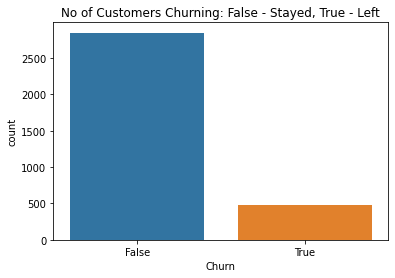

In [96]:
#visualize churn ratio using countplot
sns.countplot(df['Churn'])
plt.title("No of Customers Churning: False - Stayed, True - Left")

Wow! Thats pretty great. From the records we can tell we have pretty good numbers of loyal customers around <b>2850</b> and only 8% customer churned around <b>483</b>. Ah! who cares about 8% we have more loyal customers. Yeah, my job is done. Lets leave! Thankyou guys!



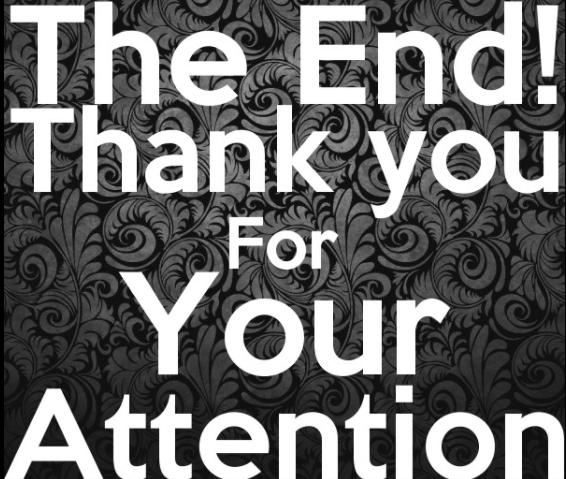

<b>Wait what</b> 

You are still here! What do you want more?
No wait dont get angry at me. Let me tell you if you waited then you are thinking in the right direction my friends. This is not the end of the story yet. Ofcourse our churning rate is small, but think yourself, if you were the owner of a bussiness, would you allow any of your customer to be upset from you.
Obviously my friends you would always want even lesser people to churn away and thus our problem doesn't end here. We need to come up with ideas so that even those 8% people would not churn.

So what can be done! Let us frame some questions that might be causing people to churn;


1. Are customers being charged more?
2. Are they getting disturbed more?
3. Are they not getting new offers?
4. Is the service poor in their area?

These are some questions we may ask ourselves looking at the data(ofcourse there could be lot more reasons) and thus analyse what might be the actual issues and how we can prevent them.

Lets begin!

# 2. Data Cleaning

Before we continue our operations we need to make sure our data is clear of missing values and mismatched data i.e. presence of outliers.
Both of these may cause troubles in our analysis. This may be due to some reasons listed below:

1. Missing values also reffered as Nan, Null etc have no effect on overall progress.
 Infact having more Nan's will make our analysis to produce only nan's. For example - in checking highest and lowest value we can get nan, while plotting results Nan can become a dominant variable. Hence it is always advisable to get rid of these null values before proceding.

2. Outliers on other hand can affect our analysis dramatically. These are the values which are far away from the normal distribution of numbers in a range. During visualisations these no. can change the complete outlook of the graphs.

These are two basic pre-requisites which should be carried out. However there is even more to data cleaning such as converting variables to different data types, feature selection for regressions, feature addition and many more. But for now we dont need as our only goal for now is exploration.

In [97]:
# lets get some information about our data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

In [98]:
# re checking null values are there or not
df[df.isnull()].sum()

State                     0.0
Account length            0.0
Area code                 0.0
International plan        0.0
Voice mail plan           0.0
Number vmail messages     0.0
Total day minutes         0.0
Total day calls           0.0
Total day charge          0.0
Total eve minutes         0.0
Total eve calls           0.0
Total eve charge          0.0
Total night minutes       0.0
Total night calls         0.0
Total night charge        0.0
Total intl minutes        0.0
Total intl calls          0.0
Total intl charge         0.0
Customer service calls    0.0
Churn                     0.0
dtype: float64

Oh great! Seems like we dont have any null values to take care of. Hence we can procede easily.

Lets also check if there are any duplicated observations(rows) because obviously we dont need them.

In [99]:
# Checking duplicates
len(df[df.duplicated()])

0

Great! No duplicates as well. Lets move forward by checking the descriptive stats of our data. This will give us idea of minimum, maximum, mean, median, percentiles and also give us a view of any outliers.

In [100]:
# Checking stats of our data
df.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


Nice! Looking at the description escpecially the max, min and percentiles value we can say there are not any hardcore outliers, but also looking at some variables like account length, total day calls, total day minutes, total evening calls,minutes and charges we can find the minimum value to be very low than 25 percentile which can be considered outliers but the logical fact that a customer may never make a call during a particular period, these values seems obvious.

Lets also visualize these stats using boxplots(also known as whisker plot) which are a graphical representation of all stats. The box represent the quartiles lower, median and upper and the whisker ends represent min and max values. The dotted points represent presence of any outliers.

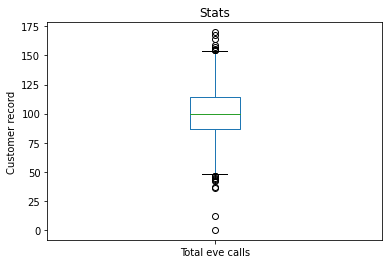

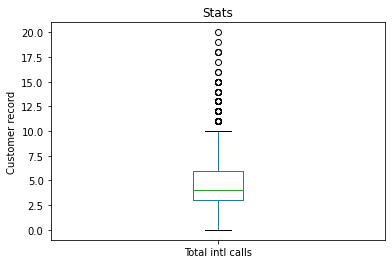

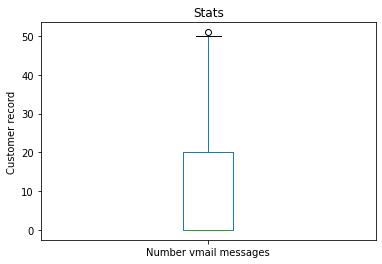

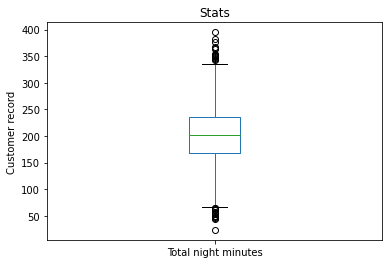

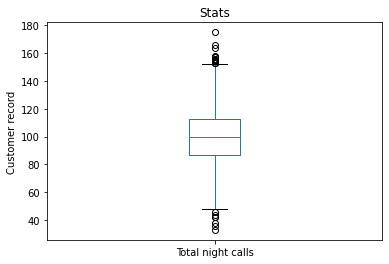

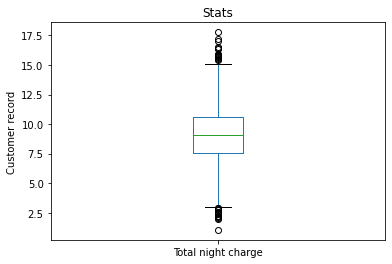

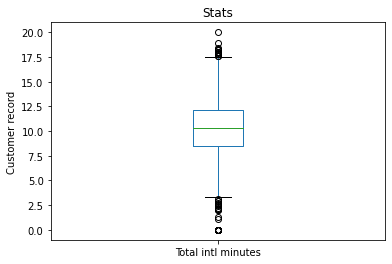

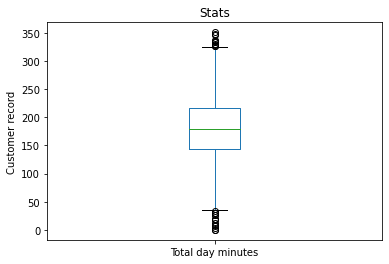

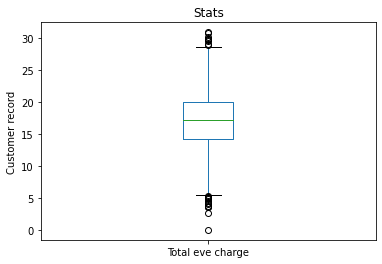

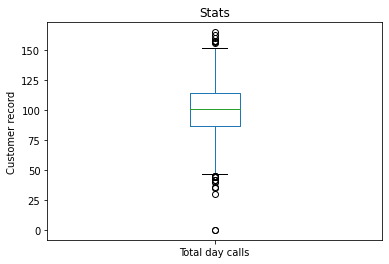

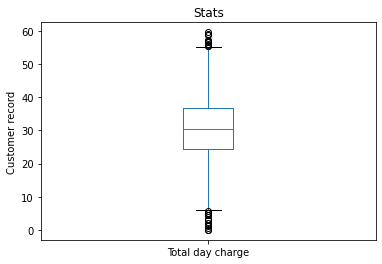

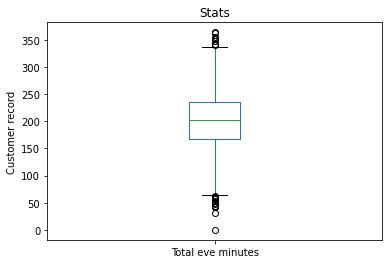

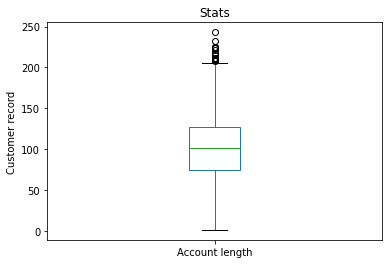

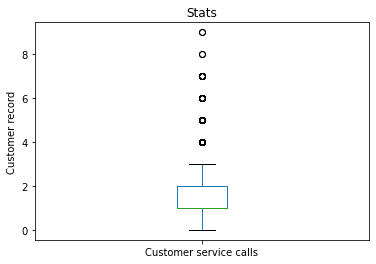

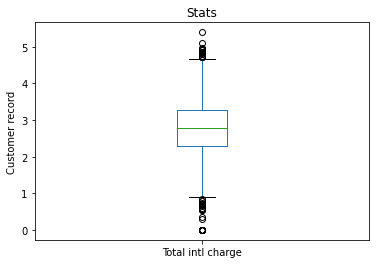

In [101]:
# storing column names in a list for iteration
list_of_columns=df.columns.to_list()

# removing string type columns and area code
list_of_columns=list(set(list_of_columns)-{'State','International plan','Voice mail plan','Churn','Area code'})

#running a for loop to iterate over all columns
for item in list_of_columns:
  plt.figure()
  df[item].plot(kind='box')
  plt.title('Stats')
  plt.ylabel('Customer record')

Well well well! Looking at a more clearer perspective of these variables we can conclude there is presence of outliers especially in 'Customer service calls' and 'Total intl calls'. However a deeper look tells us that these outlies are not that far from min and max values. So it can be reasonable enough to ignore these small fluctuations. And for those two cases, the values are not big enough and might give some useful insights in later part of our analysis.